# Network Evaluation

## Imports

In [1]:
from tablut.game import Board, draw_board
import random
import keras
import tensorflow as tf
import numpy as np
from tqdm.notebook import tqdm
import time

## Simulate Games

In [ ]:
#model = keras.models.load_model('saved_models/random_model_tablut.keras')
#model = keras.models.load_model('saved_models/supervised_model_tablut.keras')
model = keras.models.load_model('saved_models/supervised_model_tablut_md.keras')

In [2]:
def fst(a):
    return a[0]

# white == random player
# black == network
def rand_vs_net(board):
    record = []
    while(not fst(board.is_terminal())):
        if(board.turn == Board.WHITE):
            moves = board.generate_moves()
            m = moves[random.randint(0, len(moves)-1)]
            board.apply_move(m)
            record.append(m)
            continue
        else:
            q = model.predict(np.array([board.to_network_input_multidim()]))
            masked_output = [0 for x in range(0,1296)]
            for m in board.generate_moves():
                m_idx = board.get_network_output_index(m)
                masked_output[m_idx] = q[0][0][m_idx]
            best_idx = np.argmax(masked_output)
            sel_move = None
            for m in board.generate_moves():
                m_idx = board.get_network_output_index(m)
                if(best_idx == m_idx):
                    sel_move = m
            board.apply_move(sel_move)
            record.append(sel_move)
            continue
    terminal, winner = board.is_terminal()
    return winner

# white == network
# black == random player
def net_vs_rand(board):
    record = []
    while(not fst(board.is_terminal())):
        if(board.turn == Board.BLACK):
            moves = board.generate_moves()
            m = moves[random.randint(0, len(moves)-1)]
            board.apply_move(m)
            record.append(m)
            continue
        else:
            q = model.predict(np.array([board.to_network_input_multidim()]))
            masked_output = [0 for x in range(0,1296)]
            for m in board.generate_moves():
                m_idx = board.get_network_output_index(m)
                masked_output[m_idx] = q[0][0][m_idx]
            best_idx = np.argmax(masked_output)
            sel_move = None
            for m in board.generate_moves():
                m_idx = board.get_network_output_index(m)
                if(best_idx == m_idx):
                    sel_move = m
            board.apply_move(sel_move)
            record.append(sel_move)
            continue
    terminal, winner = board.is_terminal()
    return winner

# white random player
# black random player
def rand_vs_rand(board):
    while(not fst(board.is_terminal())):
        moves = board.generate_moves()
        m = moves[random.randint(0, len(moves)-1)]
        board.apply_move(m)
        continue
    terminal, winner = board.is_terminal()
    return winner

# white == white_model
# black == black_model
def model1_vsmodel2(board, model_white, model_black, to_network_white, to_network_black):
    record = []
    while(not fst(board.is_terminal())):
        if(board.turn == Board.WHITE):
            q = model_white.predict(np.array([to_network_white()]))
            masked_output = [0 for x in range(0,1296)]
            for m in board.generate_moves():
                m_idx = board.get_network_output_index(m)
                masked_output[m_idx] = q[0][0][m_idx]
            best_idx = np.argmax(masked_output)
            sel_move = None
            for m in board.generate_moves():
                m_idx = board.get_network_output_index(m)
                if(best_idx == m_idx):
                    sel_move = m
            board.apply_move(sel_move)
            record.append(sel_move)
            if len(record) > 200:
                return -1
            continue
        else:
            q = model_black.predict(np.array([to_network_black()]))
            masked_output = [0 for x in range(0,1296)]
            for m in board.generate_moves():
                m_idx = board.get_network_output_index(m)
                masked_output[m_idx] = q[0][0][m_idx]
            best_idx = np.argmax(masked_output)
            sel_move = None
            for m in board.generate_moves():
                m_idx = board.get_network_output_index(m)
                if(best_idx == m_idx):
                    sel_move = m
            board.apply_move(sel_move)
            record.append(sel_move)
            if len(record) > 200:
                return -1
            continue

    terminal, winner = board.is_terminal()
    return winner

In [ ]:
white_wins = 0
black_wins = 0
draws = 0

for i in tqdm(range(0,100)):
    board = Board()
    board.set_starting_position()
    moves = board.generate_moves()
    m = moves[random.randint(0, len(moves)-1)]
    board.apply_move(m)
    winner = rand_vs_rand(board)
    if(winner == Board.WHITE):
        white_wins += 1
    if(winner == Board.BLACK):
        black_wins += 1
    if winner == 0:
        draws += 1

all = white_wins + black_wins
print("Rand vs Rand: "+str(white_wins/all) + "/"+str(black_wins/all)+ "/"+str(draws/all))

In [ ]:
white_wins = 0
black_wins = 0
draws = 0

for i in tqdm(range(0,100)):
    board = Board()
    board.set_starting_position()
    moves = board.generate_moves()
    m = moves[random.randint(0, len(moves)-1)]
    board.apply_move(m)
    winner = net_vs_rand(board)
    if(winner == Board.WHITE):
        white_wins += 1
    if(winner == Board.BLACK):
        black_wins += 1
    if(winner == 0):
        draws += 1

all = white_wins + black_wins + draws
print("Rand Network vs Random: "+str(white_wins/all) + "/"+str(black_wins/all) + "/"+str(draws/all))


In [ ]:
white_wins = 0
black_wins = 0
draws = 0

for i in tqdm(range(0,100)):
    board = Board()
    board.set_starting_position()
    moves = board.generate_moves()
    m = moves[random.randint(0, len(moves)-1)]
    board.apply_move(m)
    winner = rand_vs_net(board)
    if(winner == Board.WHITE):
        white_wins += 1
    if(winner == Board.BLACK):
        black_wins += 1
    if(winner == 0):
        draws += 1

all = white_wins + black_wins + draws
print("Random vs Random Network: "+str(white_wins/all) + "/"+str(black_wins/all) + "/"+str(draws/all))

In [ ]:
#model = keras.models.load_model('saved_models/random_model_tablut.keras')
#model = keras.models.load_model('saved_models/supervised_model_tablut.keras')
model = keras.models.load_model('saved_models/supervised_model_tablut_md.keras')

In [6]:
model_1 = keras.models.load_model('saved_models/supervised_model_tablut.keras')
model_2 = keras.models.load_model('saved_models/supervised_model_tablut_md.keras')


white_wins = 0
black_wins = 0
draws = 0
timeouts = 0

for i in tqdm(range(0,100)):
    board = Board()
    board.set_starting_position()

    winner = model1_vsmodel2(board, model_1, model_2,
                             board.to_network_input, board.to_network_input_multidim)
    if(winner == Board.WHITE):
        white_wins += 1
    if(winner == Board.BLACK):
        black_wins += 1
    if(winner == 0):
        draws += 1
    if winner == -1:
        timeouts += 1

all = white_wins + black_wins + draws + timeouts
print("SN MD vs SN 1D: "+str(white_wins/all) + " / "+str(black_wins/all) + " / "+str(draws/all) + " | TOS: "+str(timeouts/all))


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

In [ ]:
model = keras.models.load_model('saved_models/supervised_model_tablut_md.keras')

board = Board()
board.set_starting_position()

In [ ]:
if(board.turn == Board.WHITE):
    moves = board.generate_moves()
    m = ((28, 27))
    board.apply_move(m)
else:
    q = model.predict(np.array([board.to_network_input_multidim()]))
    masked_output = [0 for x in range(0,1296)]
    for m in board.generate_moves():
        m_idx = board.get_network_output_index(m)
        masked_output[m_idx] = q[0][0][m_idx]
    best_idx = np.argmax(masked_output)
    sel_move = None
    for m in board.generate_moves():
        m_idx = board.get_network_output_index(m)
        if(best_idx == m_idx):
            sel_move = m
    board.apply_move(sel_move)
    print(q)

draw_board(board.board)

## Results:
Random vs Random = 0.85 / 15 / 0

Random Network vs Random = 0.82 / 0.18 / 0.0\
Random vs Random Network: 0.84 / 0.16 / 0.0

Supervised Network 1D vs Random = 0.94 / 0.06 / 0.0\
Random vs Supervised Network 1D = 0.1 / 0.9 / 0.0

Supervised Network MD vs Random: 0.94 / 0.06 / 0.0\
Random vs Supervised Network MD: 0.13 / 0.87 / 0.0

SN 1D vs Random Net 1D: 0.0 / 0.0 / 1.0 | TOS: 0.0
Random Net 1D vs SN 1D: 0.0 / 1.0 / 0.0 | TOS: 0.0

SN MD vs Random Net 1D: 0.0 / 0.0 / 1.0
Random Net 1D vs SN MD: 0.0 / 1.0 / 0.0 | TOS: 0.0

Random Net 1D vs Random Net 1D: 1.0 / 0.0 / 0.0\
SN 1D vs SN 1D: 0.0 / 1.0 / 0.0 | TOS: 0.0\
SN MD vs SN MD: 1.0 / 0.0 / 0.0 | TOS: 0.0

Network 1D vs Network MD: 0.0 / 1.0 / 0.0 | TOS: 0.0\
Network MD vs Network 1D: 0.0 / 0.0 / 1.0 | TOS: 0.0

In [7]:
model_1 = keras.models.load_model('saved_models/supervised_model_tablut_md.keras')
model_2 = keras.models.load_model('saved_models/supervised_model_tablut.keras')

board = Board()
board.set_starting_position()

record = []
while(not fst(board.is_terminal())):
    if(board.turn == Board.WHITE):
        q = model_1.predict(np.array([board.to_network_input_multidim()]))
        masked_output = [0 for x in range(0,1296)]
        for m in board.generate_moves():
            m_idx = board.get_network_output_index(m)
            masked_output[m_idx] = q[0][0][m_idx]
        best_idx = np.argmax(masked_output)
        sel_move = None
        for m in board.generate_moves():
            m_idx = board.get_network_output_index(m)
            if(best_idx == m_idx):
                sel_move = m
        board.apply_move(sel_move)
        record.append(sel_move)
        if len(record) > 200:
            break
        continue
    else:
        q = model_2.predict(np.array([board.to_network_input()]))
        masked_output = [0 for x in range(0,1296)]
        for m in board.generate_moves():
            m_idx = board.get_network_output_index(m)
            masked_output[m_idx] = q[0][0][m_idx]
        best_idx = np.argmax(masked_output)
        sel_move = None
        for m in board.generate_moves():
            m_idx = board.get_network_output_index(m)
            if(best_idx == m_idx):
                sel_move = m
        board.apply_move(sel_move)
        record.append(sel_move)
        if len(record) > 200:
            break
        continue

print(record)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━

In [2]:
record = [(31, 32), (67, 69), (40, 31), (27, 28), (32, 34), (53, 52), (41, 14), (77, 23), (42, 24), (5, 14), (31, 33), (4, 6), (49, 51), (45, 46), (39, 42), (36, 18), (33, 30), (28, 29), (30, 33), (29, 32), (22, 23), (37, 28), (58, 62), (75, 57), (38, 56), (3, 39), (56, 38), (18, 21), (38, 56), (28, 31), (42, 38), (43, 42), (34, 43), (6, 15), (38, 20), (76, 67), (23, 22), (52, 61), (62, 80), (46, 49), (43, 25), (32, 29), (33, 31), (29, 28), (24, 33), (14, 5), (20, 38), (44, 39), (31, 40), (35, 44), (40, 42), (61, 52), (42, 39), (13, 12), (22, 19), (5, 23), (39, 41), (44, 62), (41, 40)]

In [8]:
board = Board()
board.set_starting_position()

In [9]:
len(record)

59

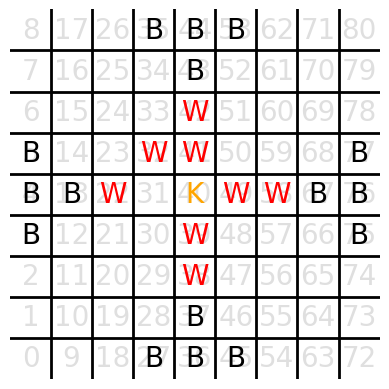

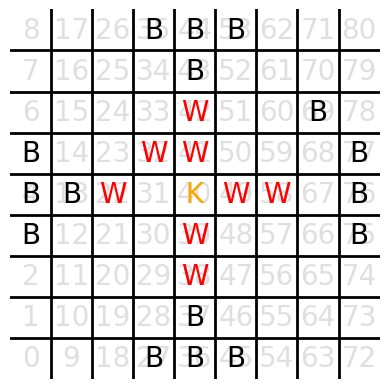

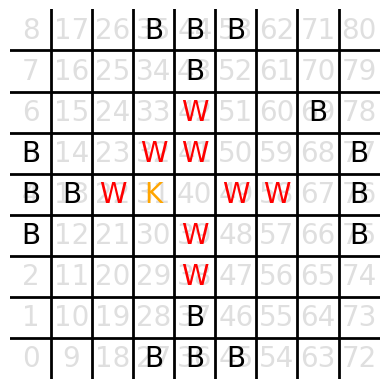

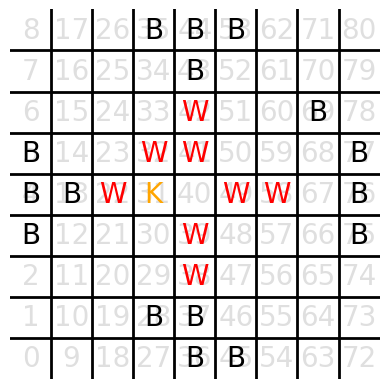

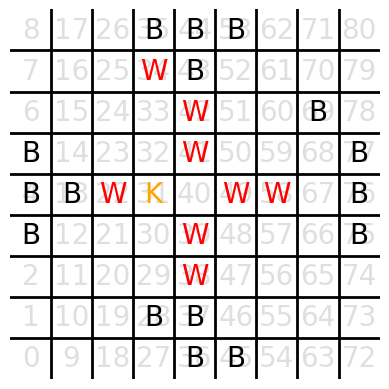

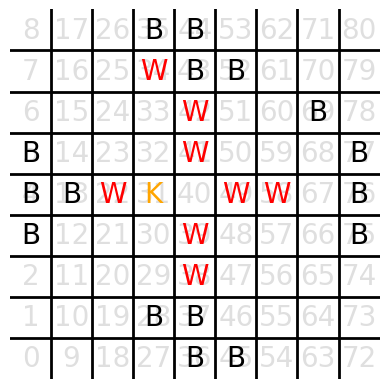

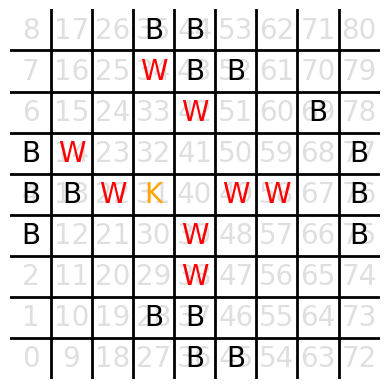

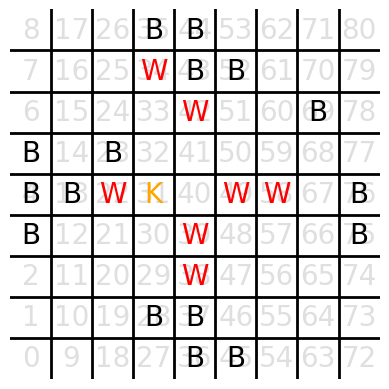

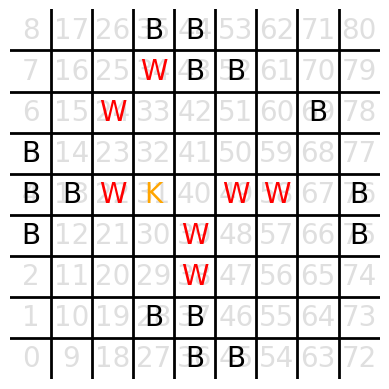

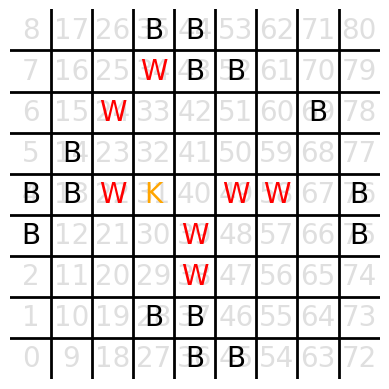

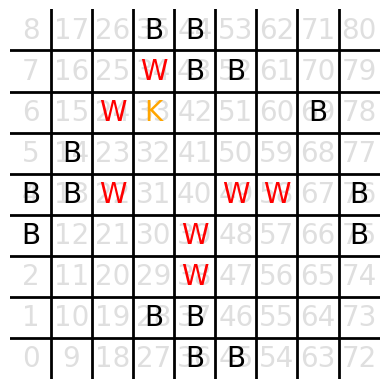

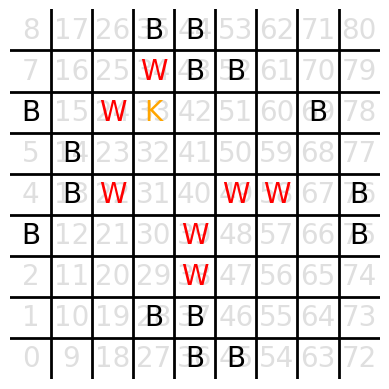

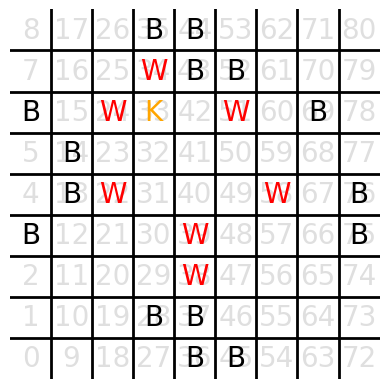

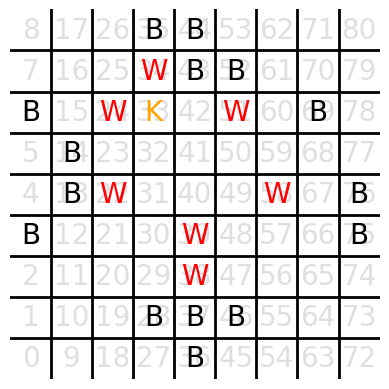

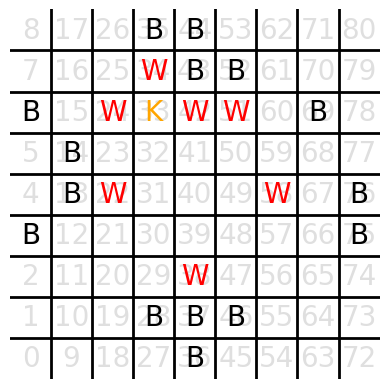

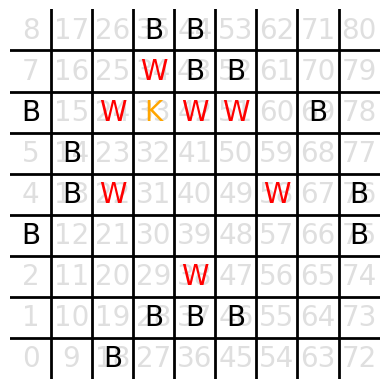

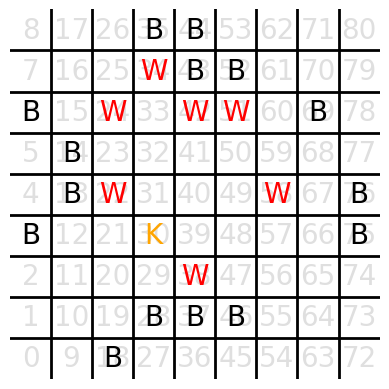

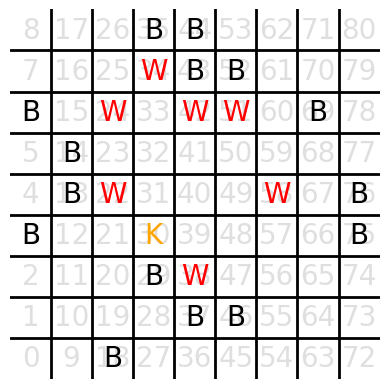

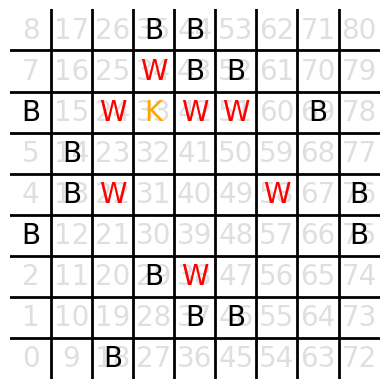

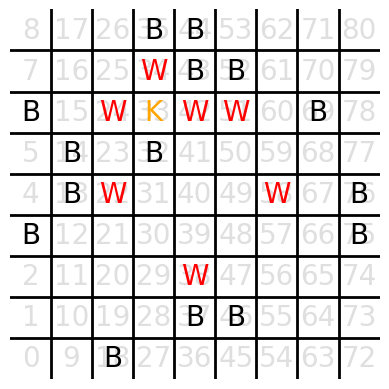

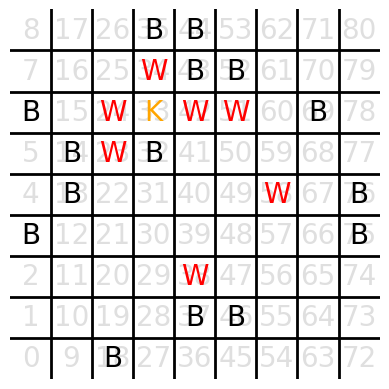

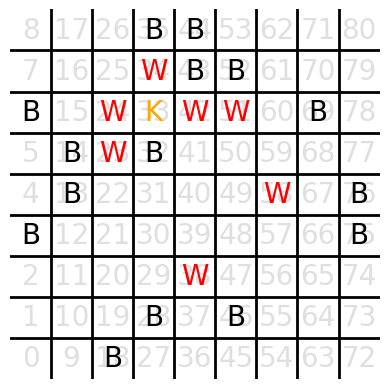

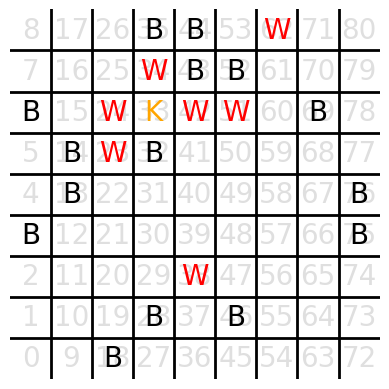

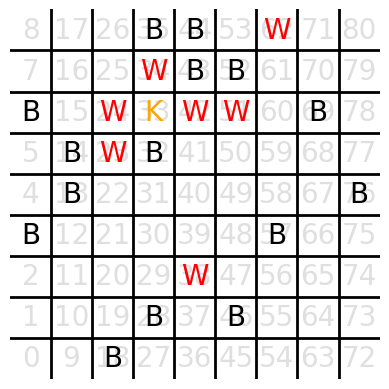

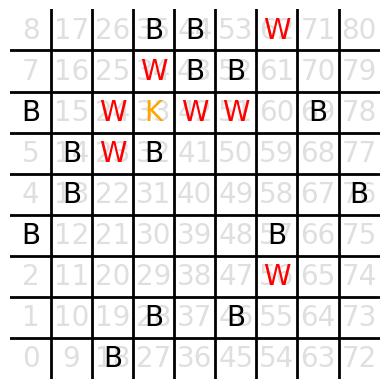

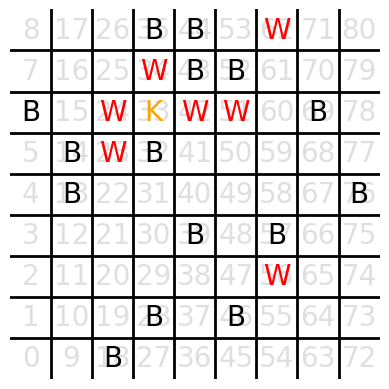

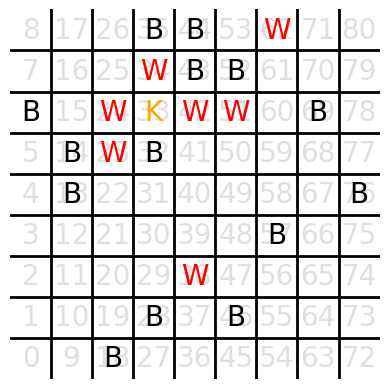

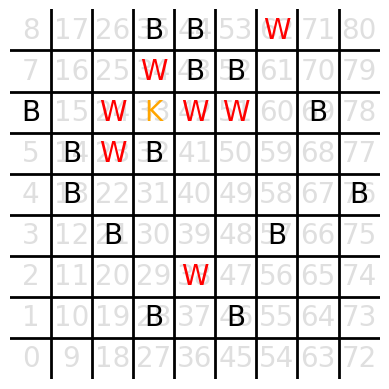

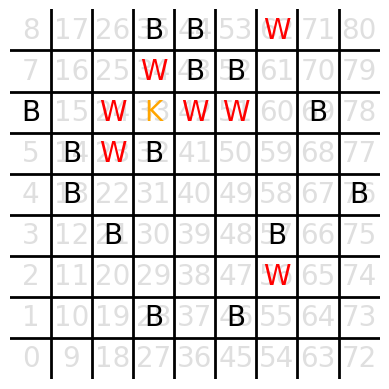

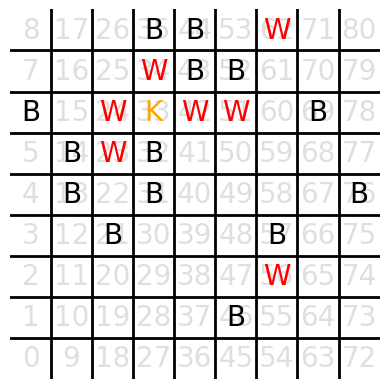

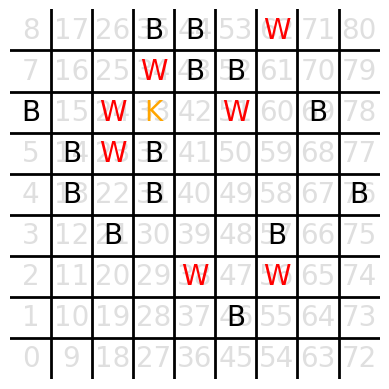

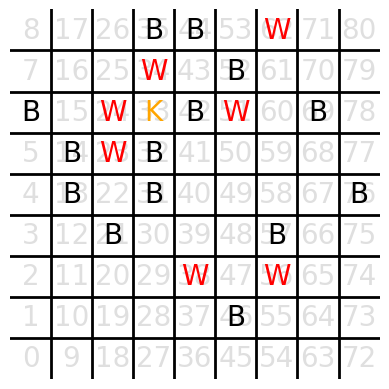

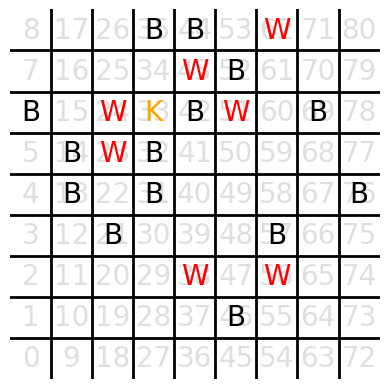

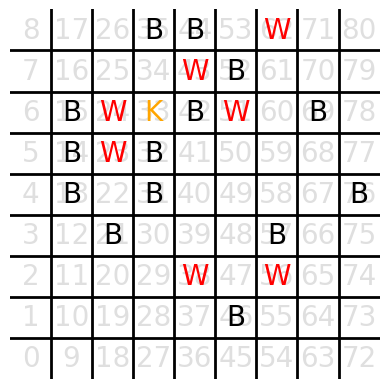

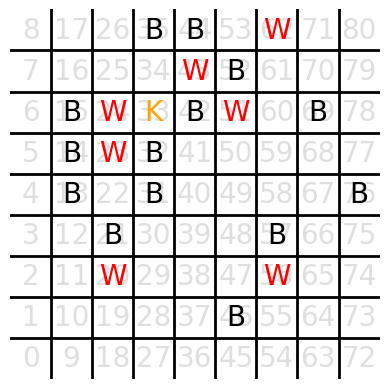

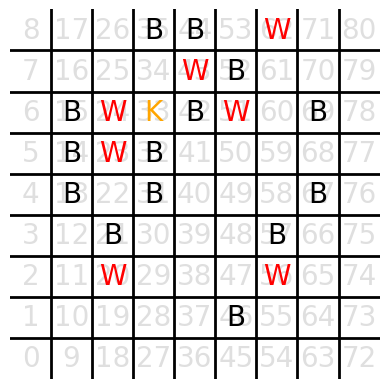

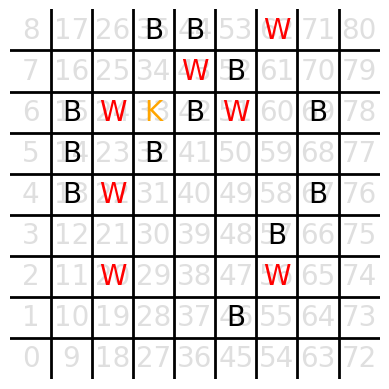

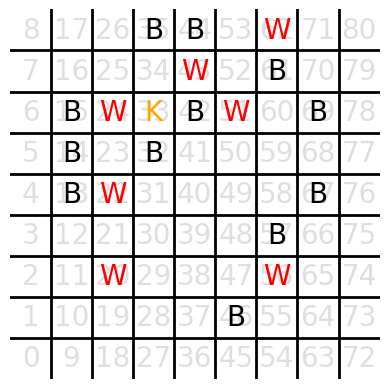

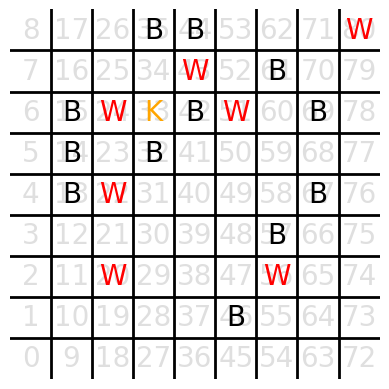

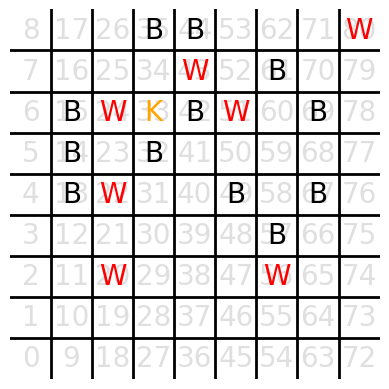

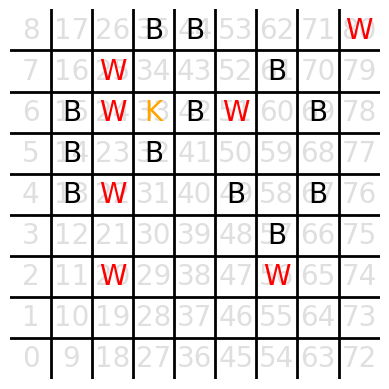

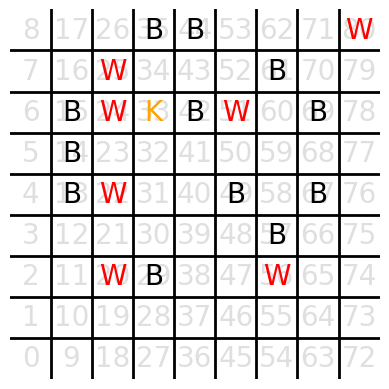

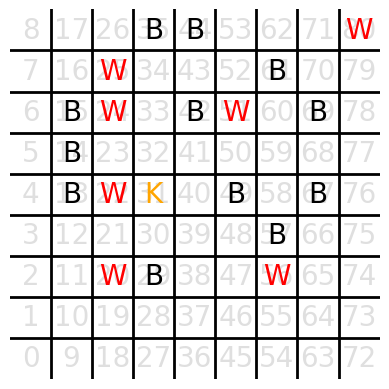

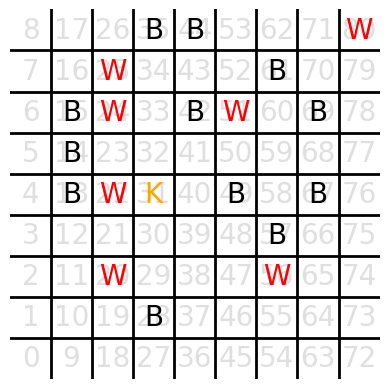

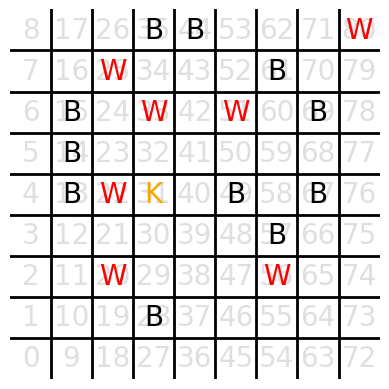

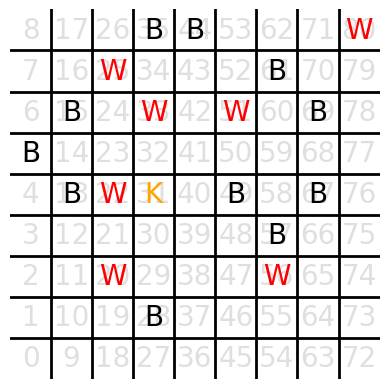

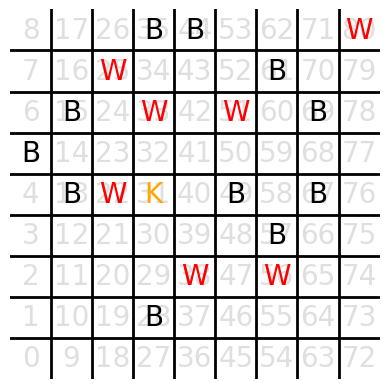

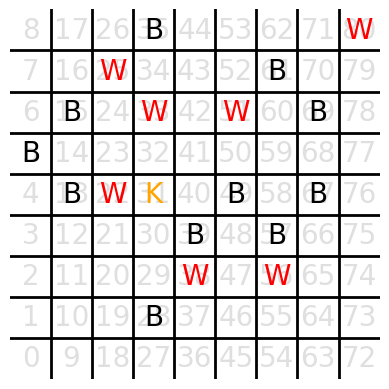

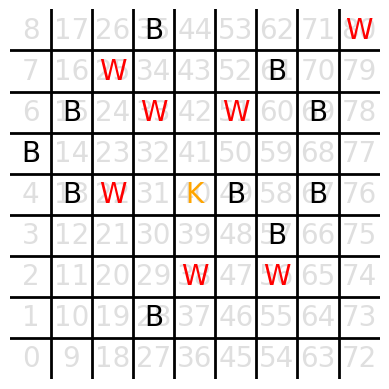

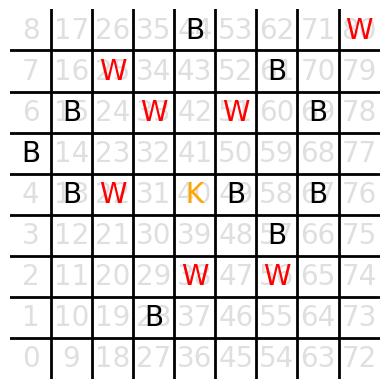

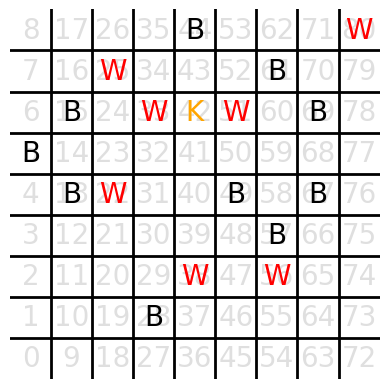

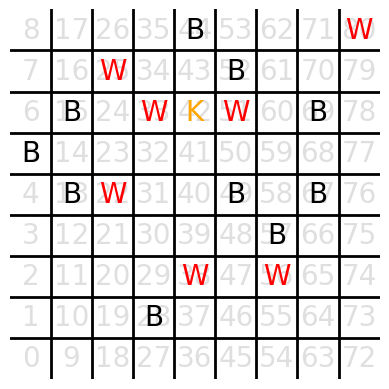

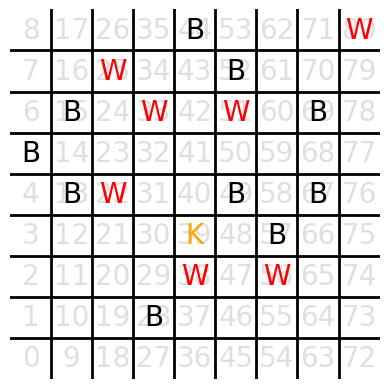

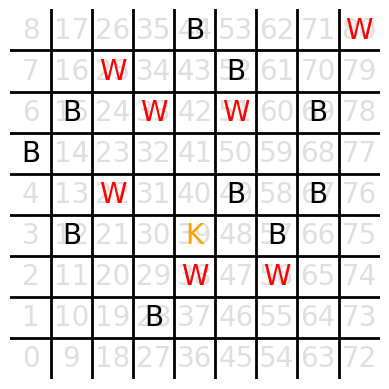

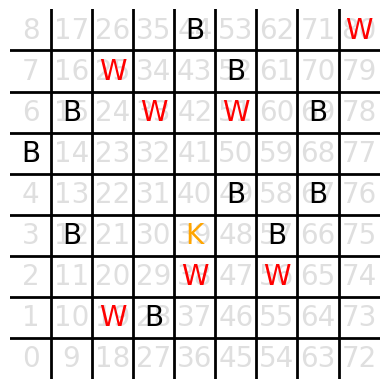

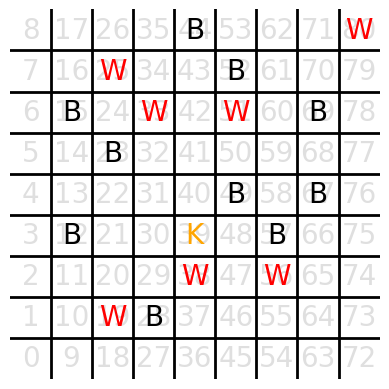

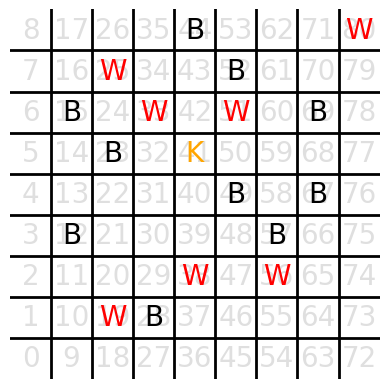

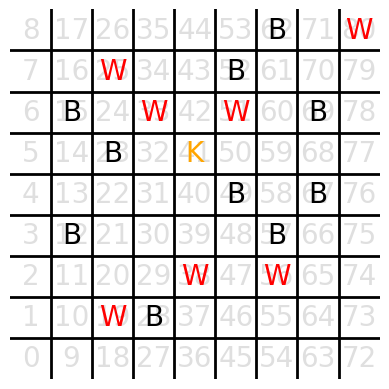

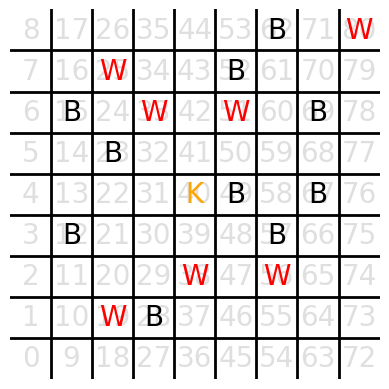

In [10]:
for i, move in enumerate(record):
    board.apply_move(move)

    draw_board(board.board)
    time.sleep(5)

In [6]:
record[-10:]

[(35, 44),
 (40, 42),
 (61, 52),
 (42, 39),
 (13, 12),
 (22, 19),
 (5, 23),
 (39, 41),
 (44, 62),
 (41, 40)]